### Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing Dataset

In [18]:
dataset= pd.read_csv('19_Ads_CTR_Optimisation.csv')
pd.DataFrame(dataset)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


### Implementing UCB

In [15]:
import math
n_users = 10000
n_ads = 10
ads = []
no_of_selection = [0]*n_ads
sum_of_rewards = [0]*n_ads
total = 0

# iterating over dataset
for i in range(0,n_users):
    ad=0
    max_upper_bound=0
    for j in range(0,n_ads):
        if(no_of_selection[j]>0):
            avg_reward = sum_of_rewards[j]/no_of_selection[j]
            delta_i = math.sqrt(3/2*math.log(i+1)/no_of_selection[j])
            upper_bound = avg_reward+delta_i
        else:
            upper_bound = 1e400
        if(upper_bound>max_upper_bound):
            max_upper_bound = upper_bound
            ad = j
    ads.append(ad)
    no_of_selection[ad] = no_of_selection[ad]+1
    reward = dataset.values[i,ad]
    sum_of_rewards[ad] = sum_of_rewards[ad]+reward
    total = total+reward

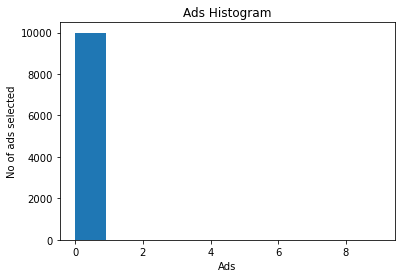

In [16]:
plt.hist(ads)
plt.title('Ads Histogram')
plt.xlabel('Ads')
plt.ylabel('No of ads selected')
plt.show()